**Meisam Asgari Jirhandeh**

#### Packages that already need to install for different approaches:
- Since I used Anaconda, the installation commands are based on it as  below
    1. Networkx: conda install -c anaconda networkx
    2. Pydot: conda install -c anaconda pydot
    3. Graphviz: conda install -c anaconda graphviz
    4. Plotly: conda install -c plotly plotly 
    5. Chart Studio: conda install -c plotly chart-studio
    6. Mpld3: conda install -c conda-forge mpld3

In [1]:
import networkx as nx
import pydot
import plotly.graph_objects as go
import plotly.io as pio
from mpl_toolkits.mplot3d import Axes3D
from networkx.readwrite import json_graph
import json

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
# Importing the Data 
edges = pd.read_excel("Data.xlsx", sheet_name="edges")
nodes = pd.read_excel("Data.xlsx", sheet_name="nodes")

In [3]:
# Main Graph
G = nx.from_pandas_edgelist(edges, 'source_id', 'target_id', edge_attr='weights', create_using=nx.DiGraph())

In [4]:
print(nx.info(G))
print('\nList of all nodes with corresponding IDs:\n', G.nodes(data=True))
print('\nList of all Edges with corresponding weight:\n', G.edges(data=True))

Name: 
Type: DiGraph
Number of nodes: 29
Number of edges: 32
Average in degree:   1.1034
Average out degree:   1.1034

List of all nodes with corresponding IDs:
 [(966, {}), (945, {}), (879, {}), (649, {}), (941, {}), (467, {}), (1042, {}), (785, {}), (619, {}), (457, {}), (639, {}), (747, {}), (185, {}), (349, {}), (1157, {}), (1152, {}), (517, {}), (158, {}), (552, {}), (498, {}), (574, {}), (1025, {}), (813, {}), (792, {}), (652, {}), (172, {}), (1009, {}), (3, {}), (709, {})]

List of all Edges with corresponding weight:
 [(966, 945, {'weights': 13}), (966, 879, {'weights': 10}), (966, 467, {'weights': 8}), (966, 1042, {'weights': 7}), (966, 785, {'weights': 7}), (966, 619, {'weights': 7}), (966, 639, {'weights': 6}), (966, 1152, {'weights': 6}), (966, 517, {'weights': 6}), (966, 158, {'weights': 6}), (966, 498, {'weights': 6}), (966, 1157, {'weights': 5}), (966, 185, {'weights': 5}), (966, 1025, {'weights': 5}), (966, 172, {'weights': 5}), (966, 3, {'weights': 5}), (879, 966, {'we

In [5]:
n_id = nodes.loc[:,'node_id'].values
n_label = nodes.loc[:,'node_label'].values
n_color = nodes.loc[:,'node_color'].values

#Nodes Mapping Structure
node_label_mapping = dict(zip(n_id,n_label))
node_color_mapping = dict(zip(n_id,n_color))
node_label_array = [node_label_mapping.get(node) for node in G.nodes()]
node_color_array = [node_color_mapping.get(node) for node in G.nodes()]

#Edges Mapping Structure
edge_weight = nx.get_edge_attributes(G,'weights')
edge_label_array = [edge_weight.get(edge) for edge in G.edges()]

# 3D Visualization of Data 

### First Approach: By exploiting Plotly Library
- Visualization of Data in 2 different layouts which support 3D dimension(Spring Layout / Circular Layout )

In [6]:
def Network_3DPlot1(G, nodes_layout):
    
    if (nodes_layout == nx.spring_layout):
        node_pose_3D = nodes_layout(G,dim=3, seed=18)
    else:
        node_pose_3D = nodes_layout(G,dim=3)
    
    #We need to seperate the X,Y,Z coordinates for Plotly
    x_nodes = [node_pose_3D[i][0] for i in G.nodes()]# x-coordinates of nodes
    y_nodes = [node_pose_3D[i][1] for i in G.nodes()]# y-coordinates
    z_nodes = [node_pose_3D[i][2] for i in G.nodes()]# z-coordinates
    
    #We also need a list of edges to include in the plot
    edge_list = G.edges()
    
    #We  need to create lists that contain the starting and ending coordinates of each edge.
    x_edges=[]
    y_edges=[]
    z_edges=[]
    
    x_mid=[]
    y_mid=[]
    z_mid=[]
    
    #Need to fill these with all of the coordiates
    for edge in edge_list:
        #format: [beginning,ending,None]
        x_coords = [node_pose_3D[edge[0]][0],node_pose_3D[edge[1]][0],None]
        x_edges += x_coords
        x_mid.append(0.5*sum(x_coords[0:2]))

        y_coords = [node_pose_3D[edge[0]][1],node_pose_3D[edge[1]][1],None]
        y_edges += y_coords
        y_mid.append(0.5*sum(y_coords[0:2]))

        z_coords = [node_pose_3D[edge[0]][2],node_pose_3D[edge[1]][2],None]
        z_edges += z_coords
        z_mid.append(0.5*sum(z_coords[0:2]))

    #Create a trace for the nodes
    trace_nodes = go.Scatter3d(x=x_nodes,
                               y=y_nodes,
                               z=z_nodes,
                               mode='markers+text',
                               textposition='top center',
                               marker=dict(symbol='circle',
                                           size=10,
                                           color=node_color_array, #color the nodes according to their community
                                           colorscale=['lightgreen','magenta'], #either green or mageneta
                                           line=dict(color='black', width=0.5)),
                               text=node_label_array,
                               hoverinfo='none')

    #Create a trace for the edges
    trace_edges = go.Scatter3d(x=x_edges,
                               y=y_edges,
                               z=z_edges,
                               mode='lines',
                               line=dict(color='black', width=3),
                               hoverinfo='none')
    
    #Create a trace for the edges' weights
    trace_weights = go.Scatter3d(x=x_mid,
                                 y=y_mid,
                                 z=z_mid,
                                 mode='markers',
                                 marker = dict(color='black',size=1.5),
                                 text = edge_label_array,
                                 hoverinfo='text')
    
    #We need to set the axis for the plot 
    axis = dict(showbackground=False,
                showline=False,
                zeroline=False,
                showgrid=False,
                showticklabels=False,
                title='')
    
    
    #Create the layout for our plot
    layout = go.Layout(title="3D Visualization of Data with their corresponding labels",
                    width=650,
                    height=625,
                    showlegend=False,
                    scene=dict(xaxis=dict(axis),
                               yaxis=dict(axis),
                               zaxis=dict(axis),
                              ),
                    margin=dict(t=100),
                    hovermode='closest')
    
    data = [trace_edges, trace_nodes, trace_weights] #Include the traces
    return data, layout 

#### 1) Spring Layout:
- Rotating & Zooming in/out are available as well
- Edges' weight can be observed on the tiny points in the middle of each edge

In [7]:
#Layout type
nodes_layout1 = nx.spring_layout 
data1, layout1 = Network_3DPlot1(G, nodes_layout1)
# Plotting the Graph
fig1_3D = go.Figure(data=data1, layout=layout1)
fig1_3D.show()

In [8]:
# Uploading A Visualization to my Plotly Account
import chart_studio
username = 'Meisam-Asgari' # your username
api_key = 'CIEkQAaDEivhPJ0tKTxX' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)


import chart_studio.plotly as py
py.plot(fig1_3D, filename = '3D Graph', auto_open=True)

'https://plotly.com/~Meisam-Asgari/1/'

In [9]:
# Generating HTML for Plotly Visualizations
# Writing the figure into an HTML file for Web Application Development purposes 
pio.write_html(fig1_3D, file='Plotly_3D.html', auto_open=True)

#### 2) Circular Layout:
- Rotating & Zooming in/out are available as well
- Edges' weight can be observed on the tiny points in the middle of each edge

In [10]:
#Layout type
nodes_layout2 = nx.circular_layout 
data2, layout2 = Network_3DPlot1(G, nodes_layout2)
# Plotting the Graph
fig2_3D = go.Figure(data=data2, layout=layout2)
fig2_3D.show()

**The three other layouts are not supported by 3D**

### Second Approach: By exploiting mplot3d toolkit
- Using linear scaling to scale the size of each node proportional to number of edges adjacent to a single node

In [11]:
def Network_3DPlot2(G, xy_angle, z_angle, nodes_layout, k, save_figure):
    # Get node positions
    if (nodes_layout == nx.spring_layout):
        node_pose_3D = nodes_layout(G,dim=3, seed=18)
    else:
        node_pose_3D = nodes_layout(G,dim=3)

    # 3D network plot
    with plt.style.context(('ggplot')): 
        fig = plt.figure(figsize=(10,10))
        fig.suptitle('3D Visualization of Data (XY_Angle={}, Z_Angle={})'.format(xy_angle,z_angle))
        ax = Axes3D(fig)
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key , value in node_pose_3D.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            
            # Scatter plot
            ax.scatter(xi, yi, zi, c = node_color_mapping[key], s=30+30*G.degree(key), edgecolors='k', alpha=0.7)
            ax.text(xi, yi, zi, node_label_mapping[key])
        
        # Coordinates of the connected nodes
        for i,j in enumerate(G.edges()):
            x = np.array((node_pose_3D[j[0]][0], node_pose_3D[j[1]][0]))
            y = np.array((node_pose_3D[j[0]][1], node_pose_3D[j[1]][1]))
            z = np.array((node_pose_3D[j[0]][2], node_pose_3D[j[1]][2]))
        
            # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=0.5)
            ax.text(np.mean(x), np.mean(y), np.mean(z), edge_label_array[i])
    
    # Set the initial view
    ax.view_init(z_angle, xy_angle)
    if save_figure == True:
        plt.savefig("mplot3d_{}.png".format(k))
        html_converter(fig,k)
    plt.show()

In [12]:
import base64
from io import BytesIO

def html_converter(fig,k):
    #encode the figure
    temp = BytesIO()
    fig.savefig(temp, format="png")
    fig_encode_bs64 = base64.b64encode(temp.getvalue()).decode('utf-8')

    html_string = """
    <img src = 'data:image/png;base64,{}'/>
    """.format(fig_encode_bs64)
    with open("mplot3d_{}.html".format(k), "w") as f:
        f.write(html_string)

#### 1) Spring Layout:
- By changing these two angles it would be possible to have a different view

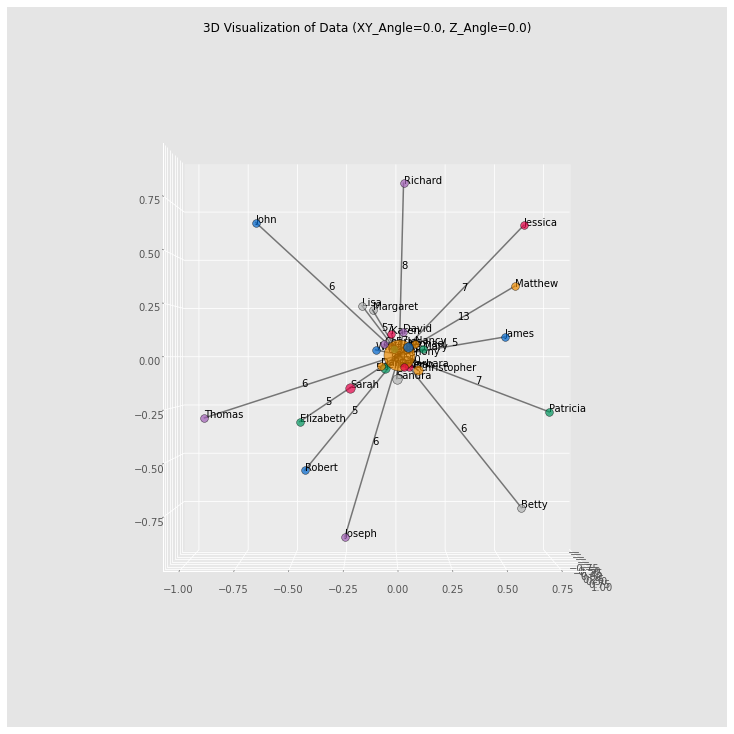

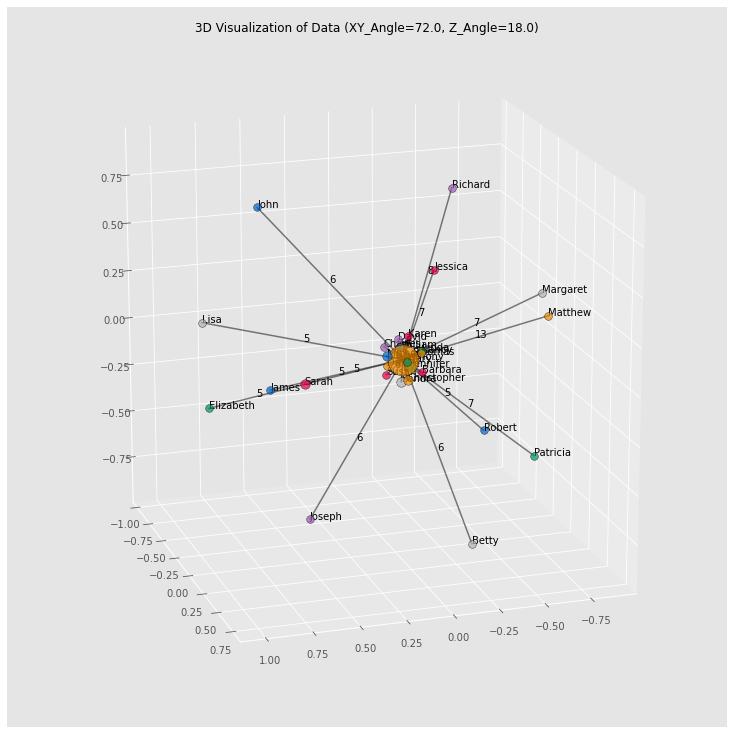

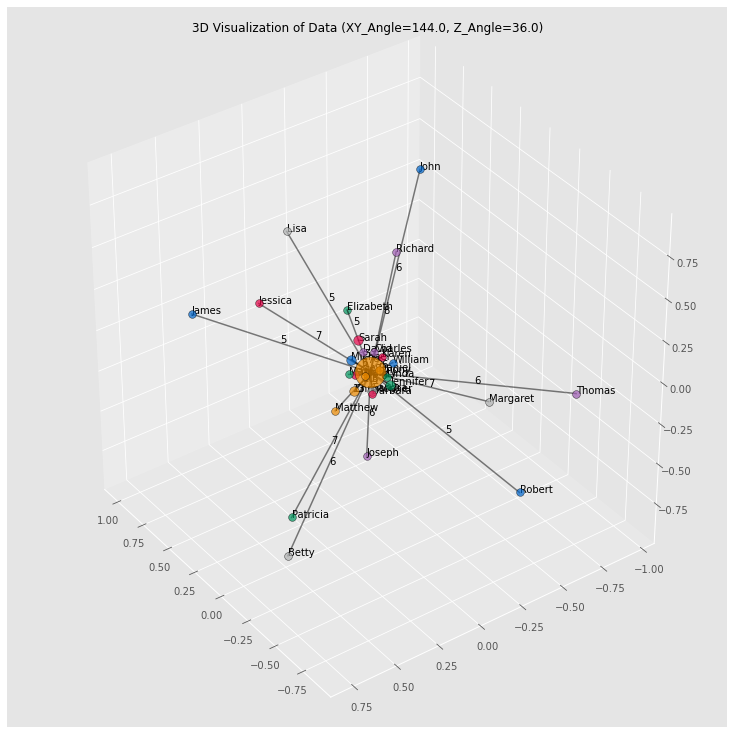

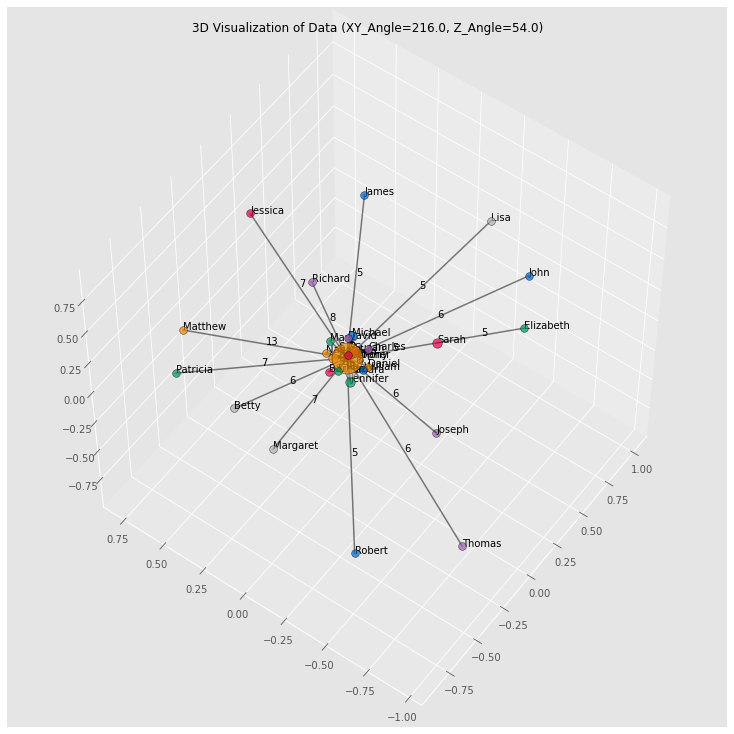

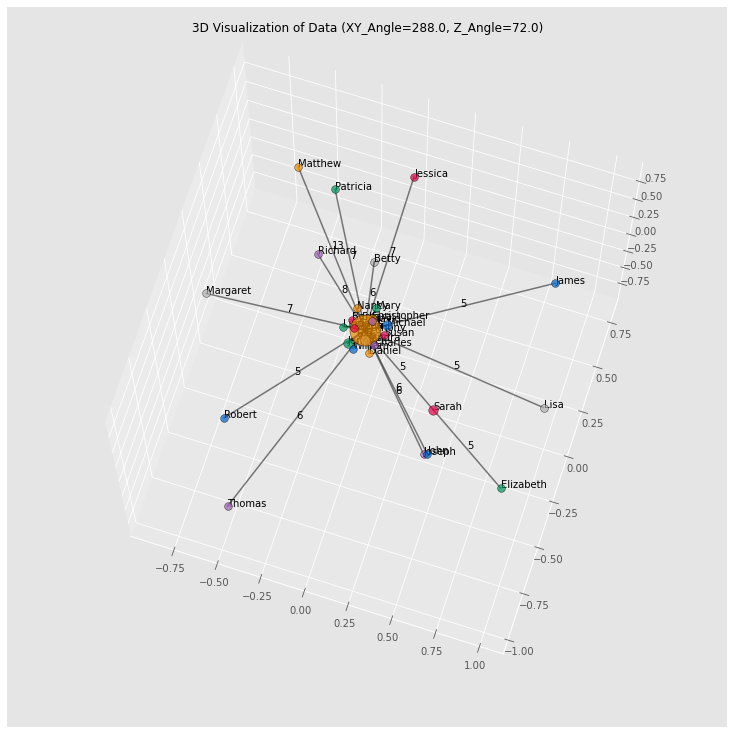

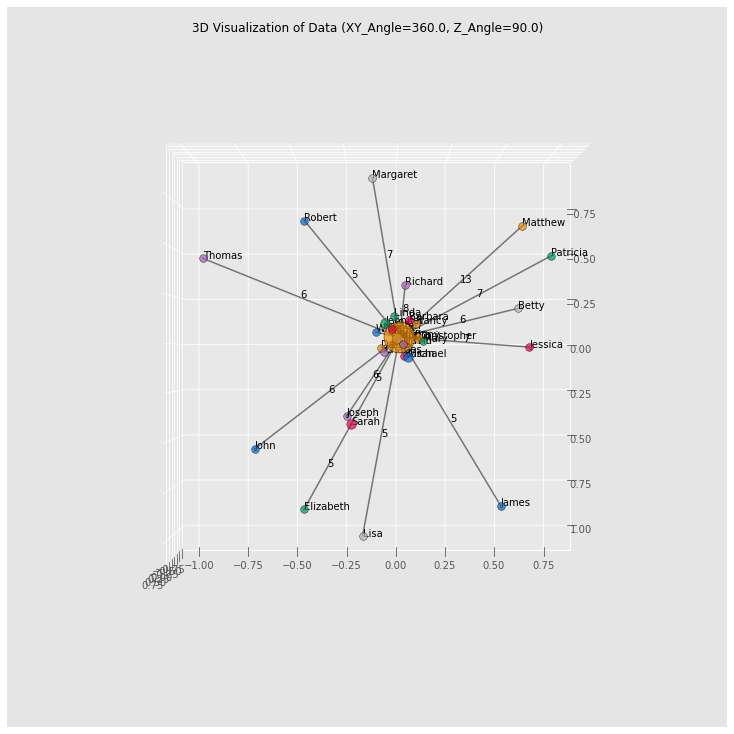

In [13]:
for k in range(6):
    xy_angle = k*360/5
    z_angle = k*90/5
    # Plotting the Graph
    Network_3DPlot2(G, xy_angle, z_angle, nodes_layout1,k, save_figure=True)

#### 2) Circular Layout:
- By changing these two angles it would be possible to have a different view

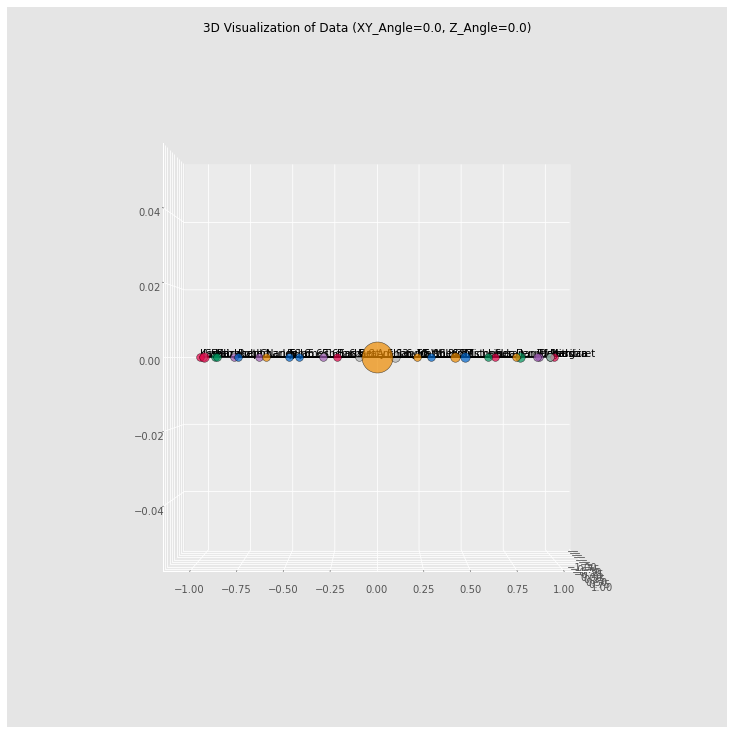

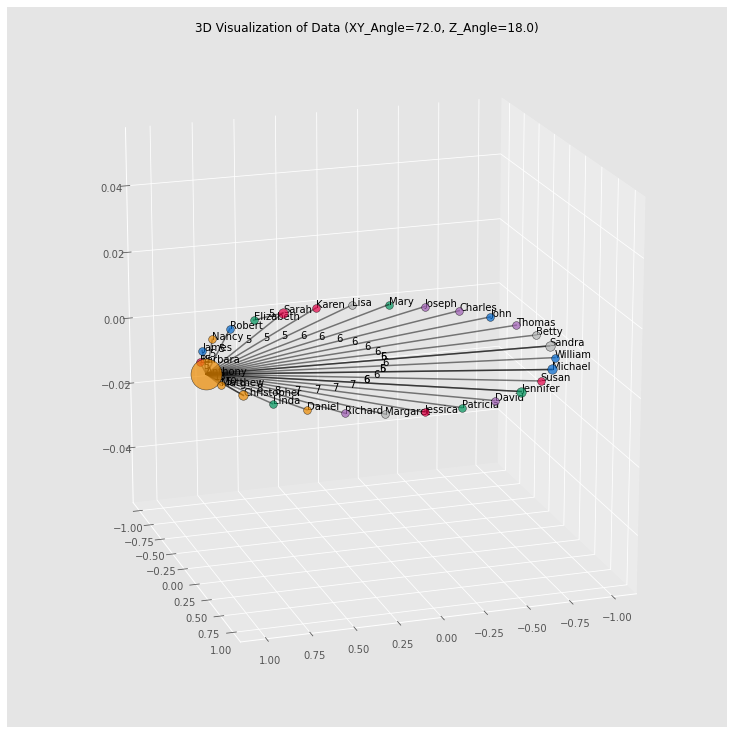

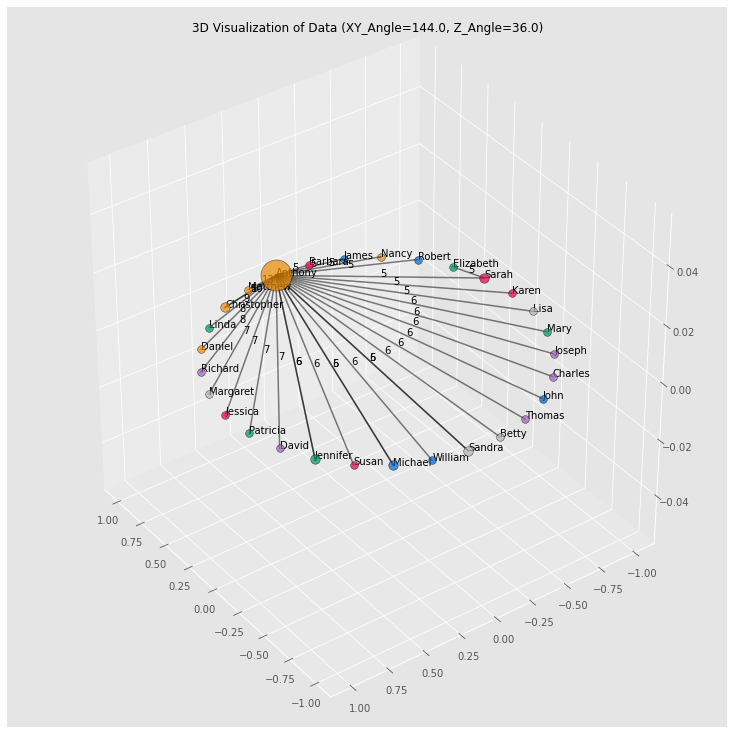

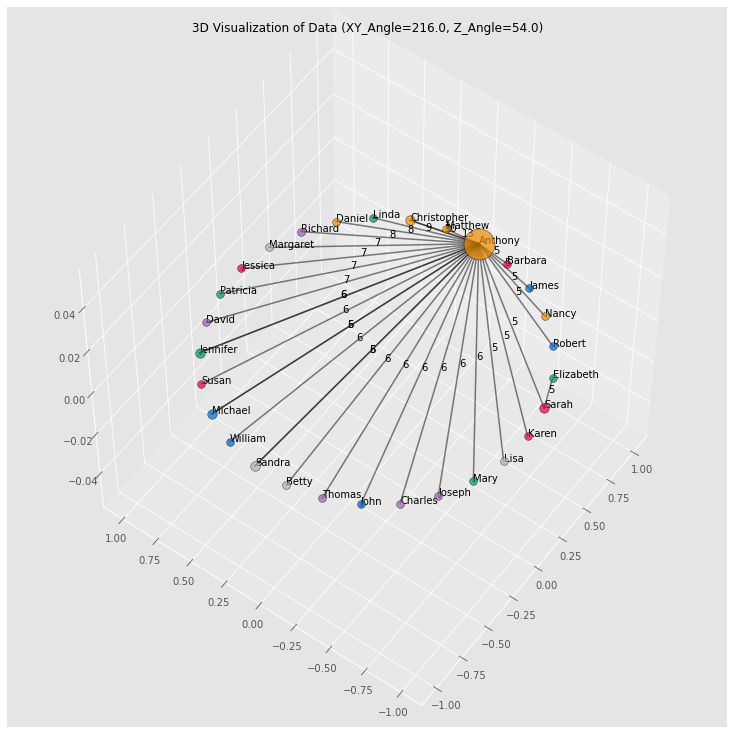

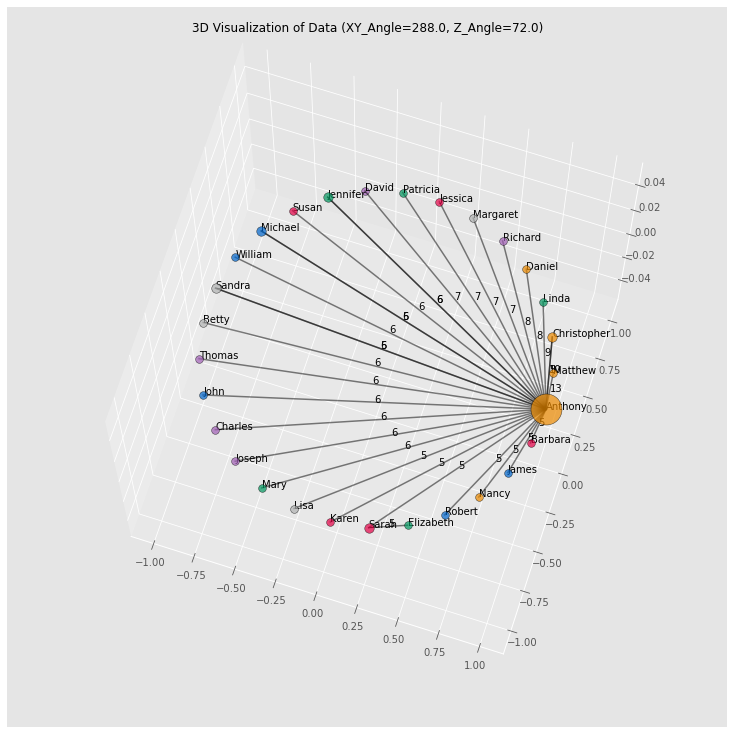

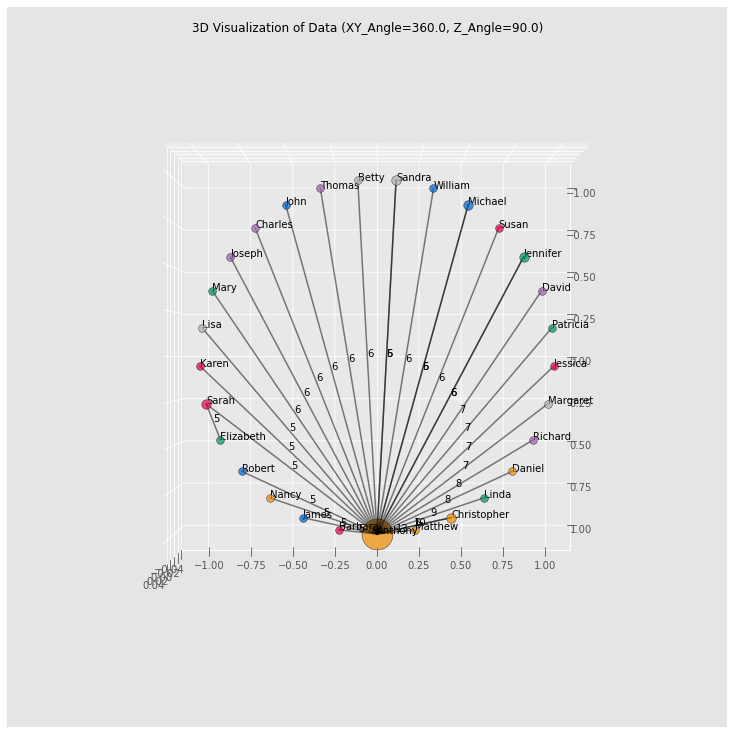

In [15]:
for k in range(6):
    xy_angle = k*360/5
    z_angle = k*90/5
    # Plotting the Graph
    Network_3DPlot2(G, xy_angle, z_angle, nodes_layout2, k, save_figure=False)